In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('relevant_data.csv')
df["sensor"] = df['pgn'].astype(str) +"-"+ df["spn"].astype(str)
df = df.sort_values(by=['timestamp'])
df_copy = df.copy()
df_copy.head()

,Unnamed: 0,timestamp,pgn,spn,decodedValue,sensor
0,47618823,0,61443,2979,0.000,61443-2979
206,54080502,0,61444,4154,0.375,61444-4154
205,54080501,0,61444,899,5.000,61444-899
204,54080500,0,61444,513,5.000,61444-513
203,54080499,0,61444,2432,6.000,61444-2432


In [31]:
df_copy.drop(['Unnamed: 0'], axis=1, inplace=True)

In [32]:
df_copy.head(10)

,timestamp,pgn,spn,decodedValue,sensor
0,0,61443,2979,0.000,61443-2979
206,0,61444,4154,0.375,61444-4154
205,0,61444,899,5.000,61444-899
204,0,61444,513,5.000,61444-513
203,0,61444,2432,6.000,61444-2432
202,0,61444,512,6.000,61444-512
201,0,61444,190,0.000,61444-190
200,0,61444,513,0.000,61444-513
199,0,61444,512,0.000,61444-512
198,0,65247,514,5.000,65247-514


In [33]:
def moving_avg(x, N=1000):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

### Visualizing Pedal Position and Engine Data

269879


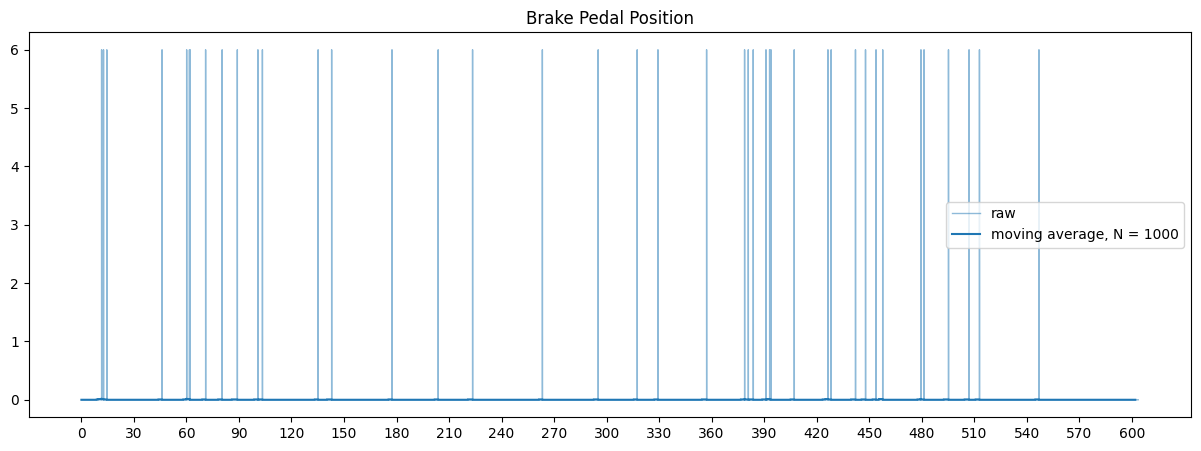

In [34]:
vals = df_copy.loc[(df_copy['sensor']=='61441-521'), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='61441-521'), 'timestamp']
avg = moving_avg(vals, 1000)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(ts[:(len(vals)-999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Brake Pedal Position')
plt.show()

485889


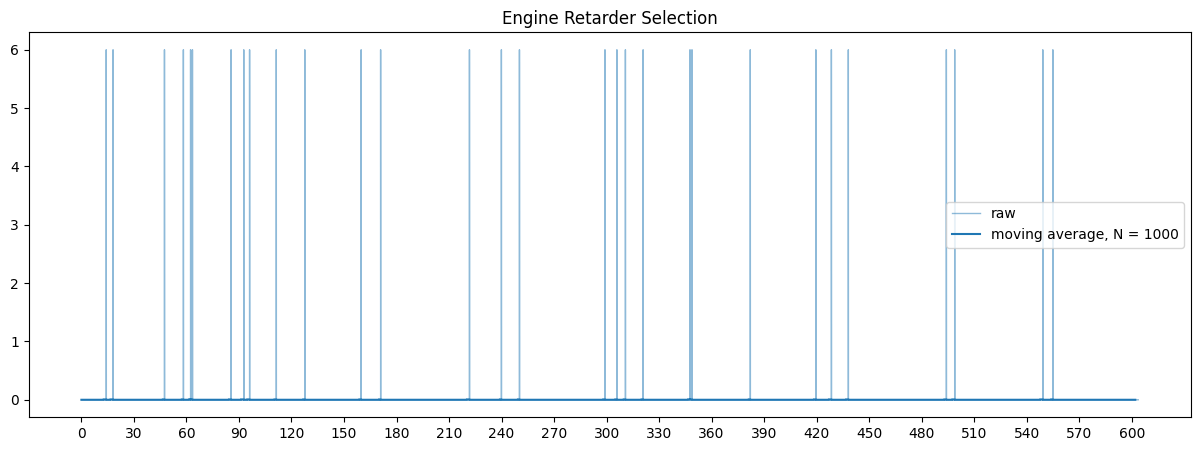

In [35]:
vals = df_copy.loc[(df_copy['sensor']=='61441-973'), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='61441-973'), 'timestamp']
avg = moving_avg(vals, 1000)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(ts[:(len(vals)-999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Engine Retarder Selection')
plt.show()

767
776


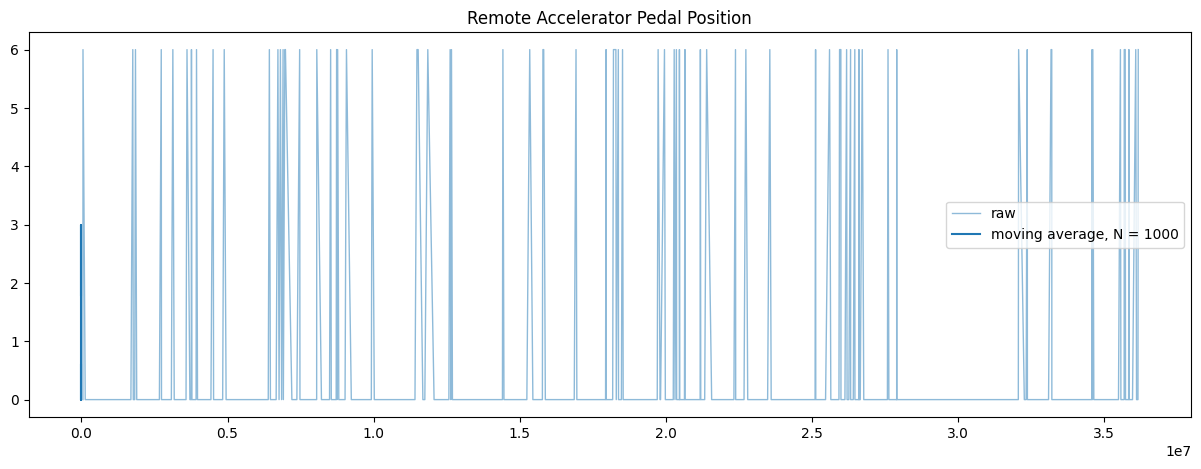

In [36]:
vals = df_copy.loc[(df_copy['sensor']=='61443-974'), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='61443-974'), 'timestamp']
avg = moving_avg(vals, 10)
print(len(avg))
print(len(vals))
plt.figure(figsize=(15,5))
plt.plot(vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(avg, 'C0', label = 'moving average, N = 1000')
#plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Remote Accelerator Pedal Position')
plt.show()

976


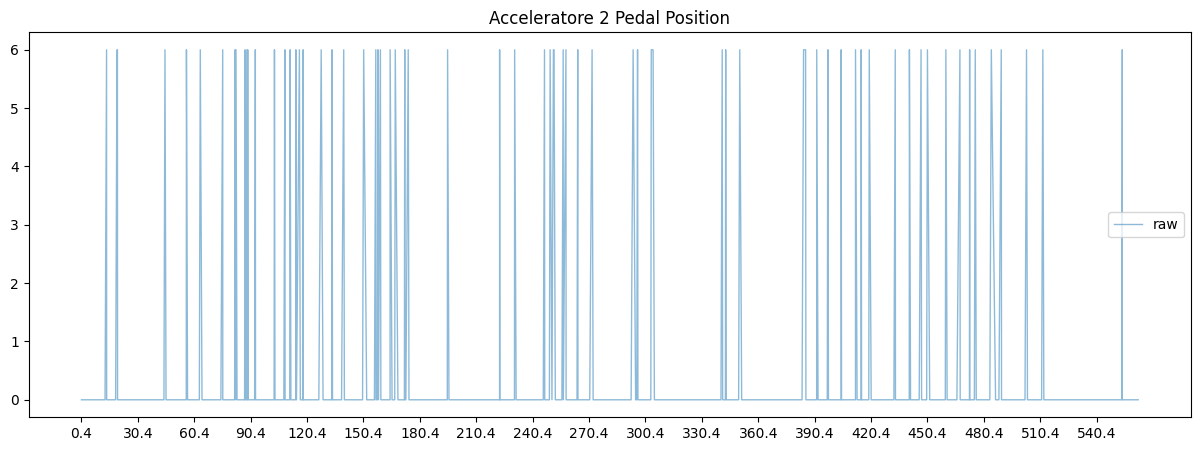

In [37]:
vals = df_copy.loc[(df_copy['sensor']=='61443-29'), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='61443-29'), 'timestamp']
avg = moving_avg(vals, 5)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
#plt.plot(ts[:(len(vals)-999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Acceleratore 2 Pedal Position')
plt.show()

1111429


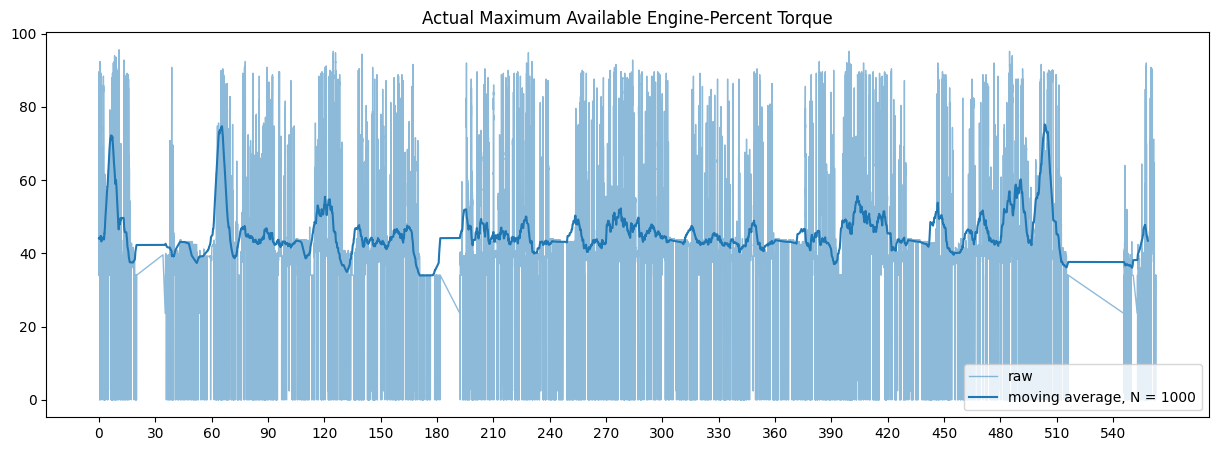

In [38]:
#This is the maximum amount of torque that the engine can immediately deliver as a percentage of the reference engine torque
vals = df_copy.loc[(df_copy['sensor']=='61443-3357'), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='61443-3357'), 'timestamp']
avg = moving_avg(vals, 10000)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(ts[:(len(vals)-9999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Actual Maximum Available Engine-Percent Torque')
plt.show()

1116429


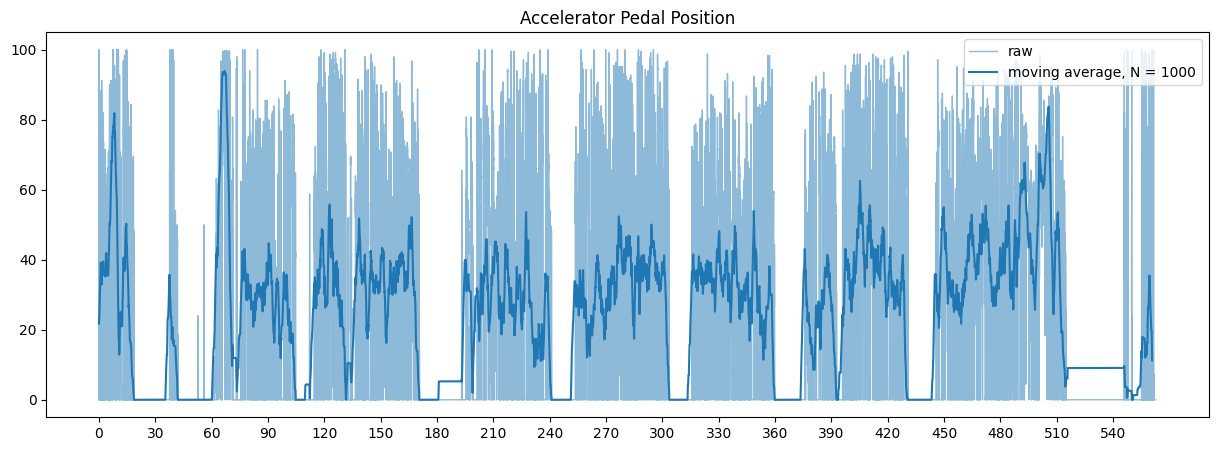

In [39]:
#The ratio of actual position of the analog engine speed/torque request input device (such as an accelerator pedal or throttle lever) to the maximum position of the input device.
vals = df_copy.loc[(df_copy['sensor']=='61443-91'), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='61443-91'), 'timestamp']
avg = moving_avg(vals, 5000)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(ts[:(len(vals)-4999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Accelerator Pedal Position')
plt.show()

1116425


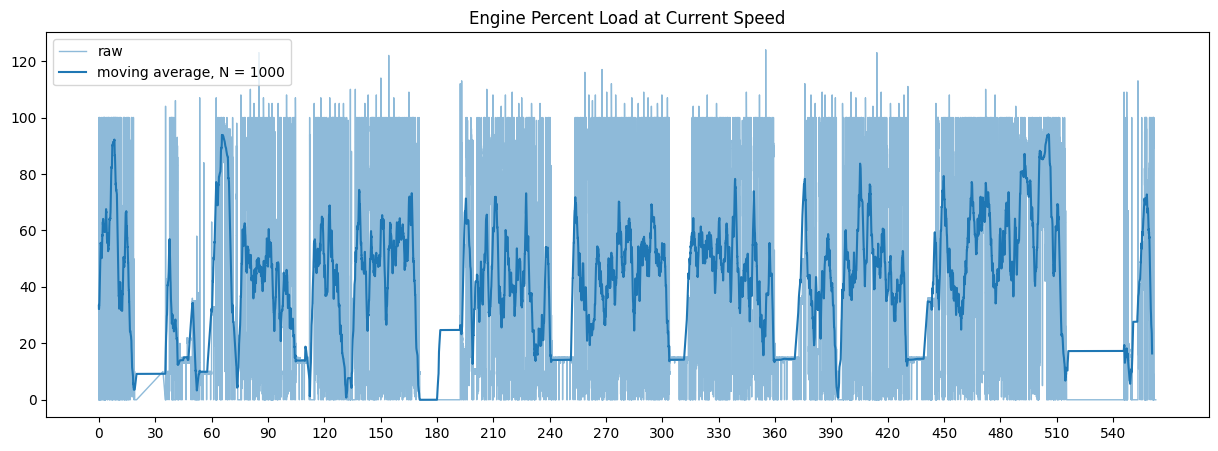

In [40]:
vals = df_copy.loc[(df_copy['sensor']=='61443-92'), 'decodedValue']     #The ratio of actual engine percent torque (indicated) to maximum indicated torque available at the current engine speed, clipped to zero torque during engine braking.
ts = df_copy.loc[(df_copy['sensor']=='61443-92'), 'timestamp']
avg = moving_avg(vals, 5000)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(ts[:(len(vals)-4999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Engine Percent Load at Current Speed')
plt.show()

1335084


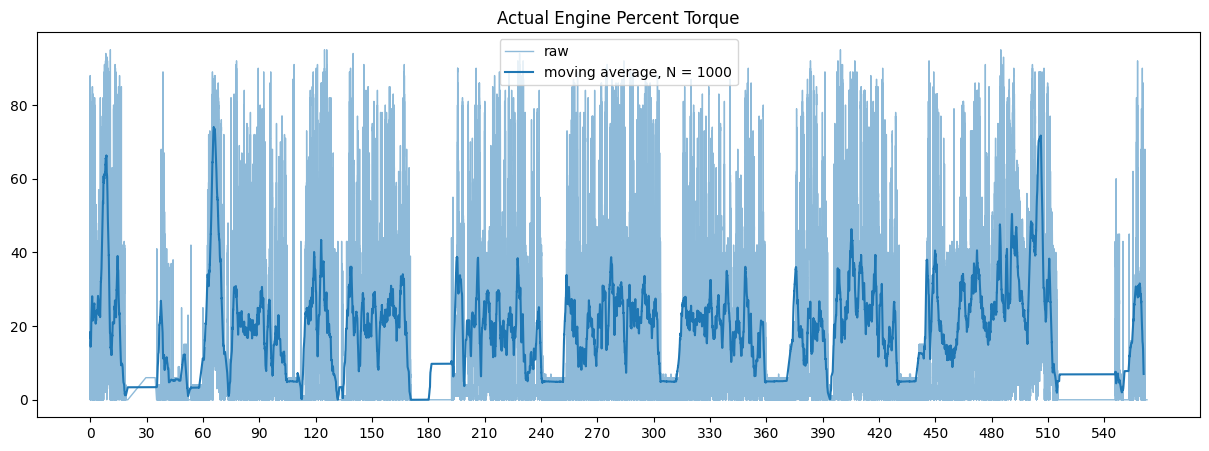

In [41]:
#The calculated output torque of the engine. The data is transmitted in indicated torque as a percent of reference engine torque, also includes torque developed in the engines to overcome friction
vals = df_copy.loc[(df_copy['sensor']=='61444-513'), 'decodedValue']        
ts = df_copy.loc[(df_copy['sensor']=='61444-513'), 'timestamp']
avg = moving_avg(vals, 5000)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(ts[:(len(vals)-4999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Actual Engine Percent Torque')
plt.show()

1335354


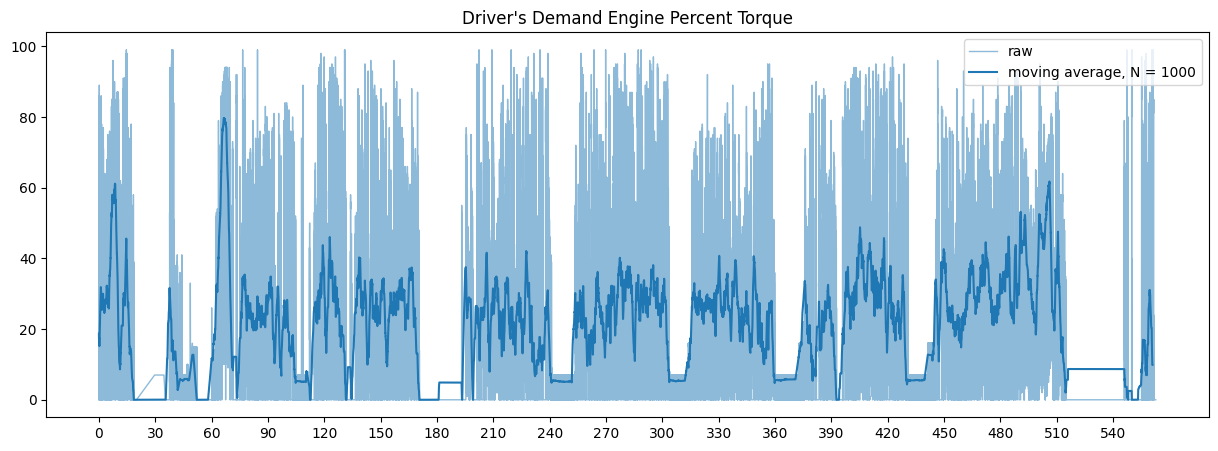

In [42]:
vals = df_copy.loc[(df_copy['sensor']=='61444-512'), 'decodedValue']            #based on the driver's pedal, cruise control, and speed governor
ts = df_copy.loc[(df_copy['sensor']=='61444-512'), 'timestamp']
avg = moving_avg(vals, 5000)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(ts[:(len(vals)-4999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Driver\'s Demand Engine Percent Torque')
plt.show()

1330855


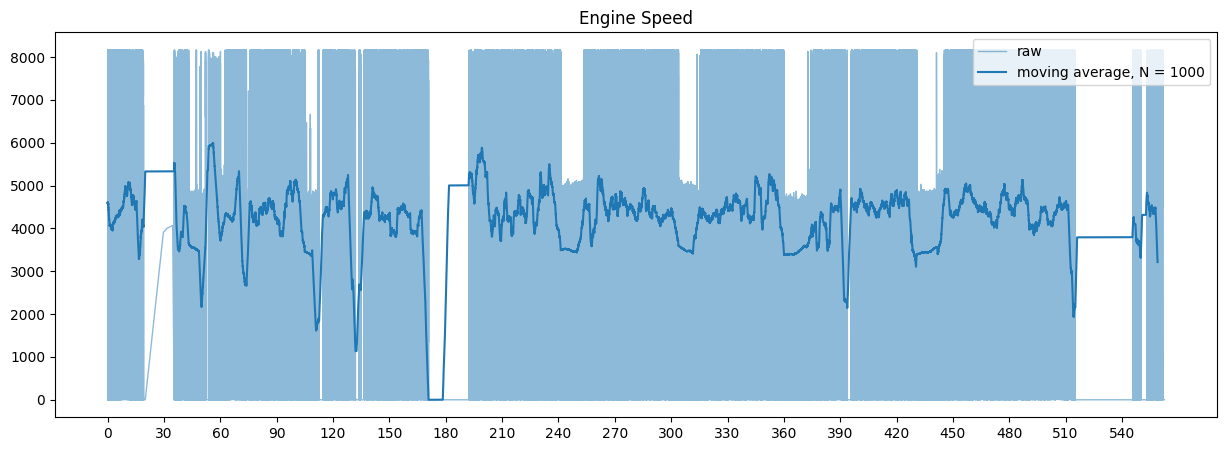

In [43]:
vals = df_copy.loc[(df_copy['sensor']=='61444-190'), 'decodedValue']            #Actual engine speed which is calculated over a minimum crankshaft angle of 720 degrees divided by the number of cylinders.
ts = df_copy.loc[(df_copy['sensor']=='61444-190'), 'timestamp']
avg = moving_avg(vals, 10000)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(ts[:(len(vals)-9999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Engine Speed')
plt.show()

1137396


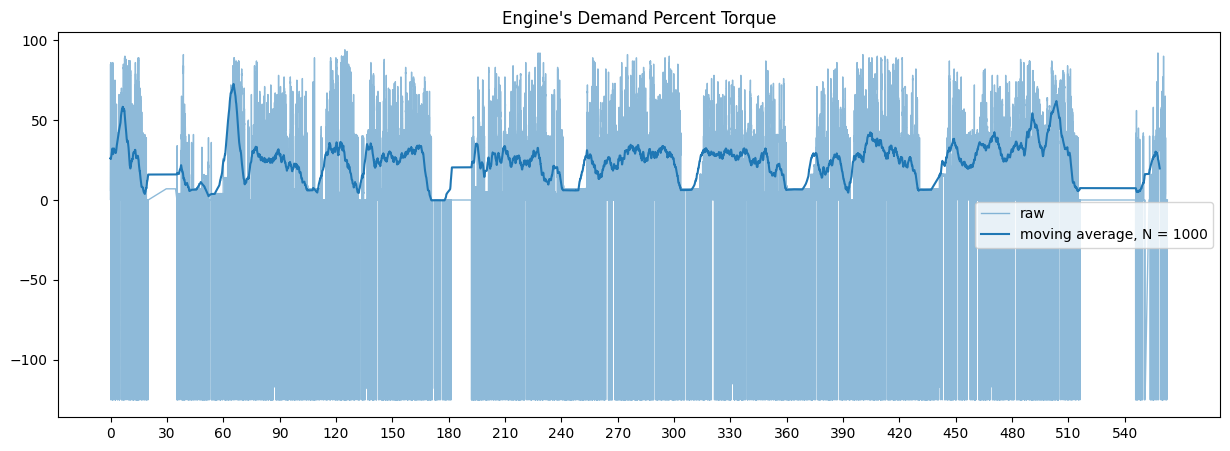

In [44]:
vals = df_copy.loc[(df_copy['sensor']=='61444-2432'), 'decodedValue']                   #torque requested by all components internal to the powertrain
ts = df_copy.loc[(df_copy['sensor']=='61444-2432'), 'timestamp']
avg = moving_avg(vals, 10000)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(ts[:(len(vals)-9999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Engine\'s Demand Percent Torque')
plt.show()

214400


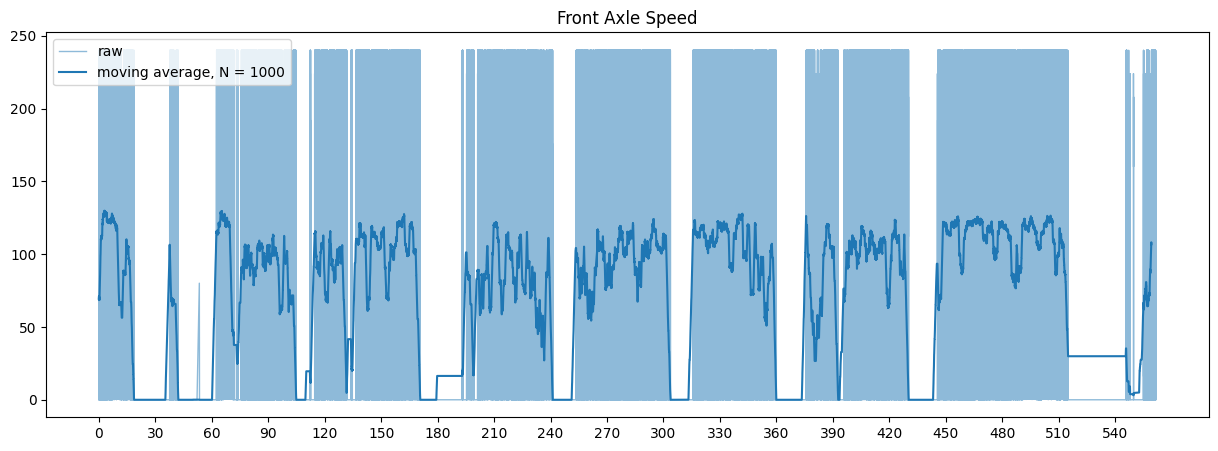

In [45]:
#Checking front wheel speed information
vals = df_copy.loc[(df_copy['sensor']=='65215-904'), 'decodedValue']
ts = df_copy.loc[(df_copy['sensor']=='65215-904'), 'timestamp']
avg = moving_avg(vals, 1000)
print(len(avg))
plt.figure(figsize=(15,5))
plt.plot(ts/60000, vals, linewidth=1, alpha=0.5, label='raw')
plt.plot(ts[:(len(vals)-999)]/60000, avg, 'C0', label = 'moving average, N = 1000')
plt.xticks(np.arange(min(ts/60000), max(ts/60000)+1, 30.0))
plt.legend()
plt.title('Front Axle Speed')
plt.show()

Creating a dataset with only relevant engine sensors

In [46]:
engine_sys = ['61443-91', '61444-513', '61444-512']
df_copy.drop('timestamp', axis=1, inplace= True)
df_copy = df_copy[df_copy['sensor'].isin(engine_sys)]

In [47]:
df_copy.shape

(3801864, 4)

In [48]:
df_copy.head()

,pgn,spn,decodedValue,sensor
204,61444,513,5.0,61444-513
202,61444,512,6.0,61444-512
200,61444,513,0.0,61444-513
199,61444,512,0.0,61444-512
192,61444,513,57.0,61444-513


In [55]:
lsofdicts = []                      #Reshaping the dataset to have each sensor as a column
for index,rows in df_copy.iterrows():
    x = rows[3]
    y = rows[2]
    z = {x: y}
    lsofdicts.append(z)
this_df = pd.DataFrame(lsofdicts)

In [56]:
this_df.head()

,61444-513,61444-512,61443-91
0,5.0,NaN,NaN
1,NaN,6.0,NaN
2,0.0,NaN,NaN
3,NaN,0.0,NaN
4,57.0,NaN,NaN


In [57]:
this_df.fillna(method='ffill', inplace=True)    #Filling null values with forward fill method
this_df.dropna(inplace=True)
this_df.head(10)

,61444-513,61444-512,61443-91
7,28.0,34.0,19.2
8,28.0,0.0,19.2
9,4.0,0.0,19.2
10,4.0,0.0,19.2
11,4.0,77.0,19.2
12,4.0,77.0,0.0
13,0.0,77.0,0.0
14,0.0,77.0,58.4
15,0.0,55.0,58.4
16,48.0,55.0,58.4


In [58]:
this_df.shape

(3801857, 3)

In [59]:
this_df.head()

,61444-513,61444-512,61443-91
7,28.0,34.0,19.2
8,28.0,0.0,19.2
9,4.0,0.0,19.2
10,4.0,0.0,19.2
11,4.0,77.0,19.2


Checking Distributions

<Axes: >

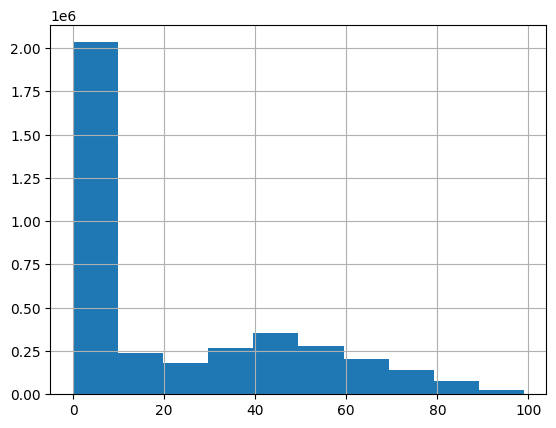

In [60]:
this_df['61444-512'].hist()     #Driver's demand percent torque

<Axes: >

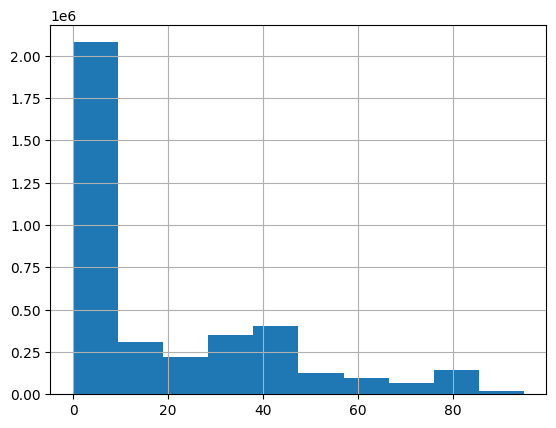

In [61]:
this_df['61444-513'].hist()     #Actual Engine Percent Torque

<Axes: >

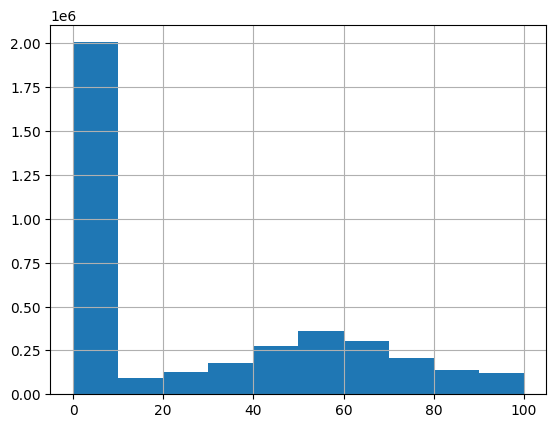

In [62]:
this_df['61443-91'].hist()      #Accelerator pedal position

In [63]:
#this_df.to_csv('engine_system.csv') #csv with real engine sensor values